In [1]:
!wget http://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv

--2022-04-21 20:18:35--  http://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv
pythondatascience.plavox.info (pythondatascience.plavox.info) をDNSに問いあわせています... 18.180.82.32, 54.168.155.129
pythondatascience.plavox.info (pythondatascience.plavox.info)|18.180.82.32|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 301 Moved Permanently
場所: https://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv [続く]
--2022-04-21 20:18:35--  https://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv
pythondatascience.plavox.info (pythondatascience.plavox.info)|18.180.82.32|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 84199 (82K) [application/octet-stream]
`winequality-red.csv.1' に保存中

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s 時間 0.02s      

2022-04-21 20:18:35 (5.20 MB/s) - `winequality-red.csv.1' へ保存完了 [84199/84199]



In [2]:
import pandas as pd

df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# xに説明変数全体、x1に密度(density)、x2に揮発酸、yにアルコール度数
x = df[['density', 'volatile acidity']]
y = df[['alcohol']]
x1 = df[['density']]
x2 = df[['volatile acidity']]

print(x.shape)
print(y.shape)

(1599, 2)
(1599, 1)


In [4]:
from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import matplotlib.pyplot as plt
import seaborn as sns

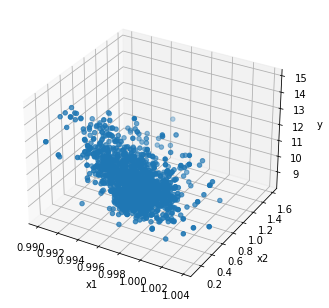

In [5]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter3D(x1,x2,y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

plt.show()

In [6]:
from sklearn import preprocessing
#正規化
mm = preprocessing.MinMaxScaler()
l_2d_min_max = mm.fit_transform(x)

In [7]:
sscaler = preprocessing.StandardScaler()
xss_sk = sscaler.fit_transform(x)
yss_sk = sscaler.fit_transform(y)

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

model_lr = LinearRegression()
model_lr.fit(x,y)

LinearRegression()

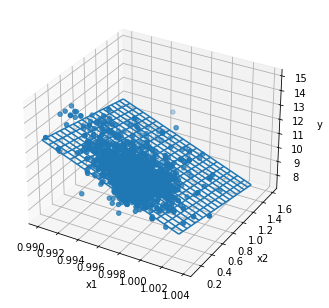

[[-277.78274856   -1.13941954]]
[287.90342428]
0.28283042699952976


In [10]:
'''
coef_:偏回帰係数
intercept_:切片

fit(): 線形回帰モデルの当てはめ
predict(): 作成したモデルを利用して予測を実行
score(x,y):決定係数R^2を出力
→ 決定係数: 推定された回帰式の当てはまりの良さを表す
           0から1までの値をとる。
           どれくらい説明変数が目的変数を説明できているか
'''
fig=plt.figure()
ax=Axes3D(fig)

ax.scatter3D(x1, x2, y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

mesh_x1 = np.arange(x1.min()[0], x1.max()[0], (x1.max()[0]-x1.min()[0])/20)
mesh_x2 = np.arange(x2.min()[0], x2.max()[0], (x2.max()[0]-x2.min()[0])/20)
mesh_x1, mesh_x2 = np.meshgrid(mesh_x1, mesh_x2)
mesh_y = model_lr.coef_[0][0] * mesh_x1 + model_lr.coef_[0][1] * mesh_x2 + model_lr.intercept_[0]
ax.plot_wireframe(mesh_x1, mesh_x2, mesh_y)
plt.show()

print(model_lr.coef_)
print(model_lr.intercept_)
print(model_lr.score(x, y))

In [12]:
model_lr_std = LinearRegression()
model_lr_std.fit(xss_sk,yss_sk)

print(model_lr_std.coef_)
print(model_lr_std.intercept_)
print(model_lr_std.score(xss_sk,yss_sk))

[[-0.49196281 -0.19145194]]
[1.1769986e-14]
0.28283042699952887
